In [3]:
import pandas as pd
import numpy as np

In [4]:
from constants import cleaned_data_filepath
participants = ["105", "106", "107", "904", "905", "906"]

from ml_prep import prep_ml
X,y = prep_ml(cleaned_data_filepath, participants)

In [5]:
y

array([1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 0.

In [6]:
(n, d) = X.shape
assert n == y.shape[0]

In [12]:
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier
import sys

model = RandomForestClassifier()

num_trials = 100
valid_errors = np.zeros(num_trials)

for i in range(100):
    np.random.shuffle(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    model.fit(X_train, y_train)    
    
    valid_errors[i] = np.mean(model.predict(X_test) != y_test)
    
    sys.stdout.write('\r')
    p = (i + 1) / num_trials
    sys.stdout.write("[%-20s] %d%%" % ('='*int(20*p), p*100))

c:\users\karl\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[====================] 100%

In [13]:
valid_errors

array([0.47252747, 0.50549451, 0.43956044, 0.46153846, 0.41758242,
       0.51648352, 0.54945055, 0.46153846, 0.50549451, 0.52747253,
       0.51648352, 0.53846154, 0.54945055, 0.56043956, 0.54945055,
       0.46153846, 0.53846154, 0.53846154, 0.51648352, 0.43956044,
       0.50549451, 0.52747253, 0.54945055, 0.58241758, 0.37362637,
       0.56043956, 0.48351648, 0.53846154, 0.57142857, 0.48351648,
       0.49450549, 0.56043956, 0.50549451, 0.50549451, 0.59340659,
       0.49450549, 0.45054945, 0.51648352, 0.47252747, 0.58241758,
       0.50549451, 0.49450549, 0.49450549, 0.53846154, 0.47252747,
       0.49450549, 0.45054945, 0.46153846, 0.3956044 , 0.43956044,
       0.48351648, 0.47252747, 0.50549451, 0.51648352, 0.54945055,
       0.48351648, 0.57142857, 0.42857143, 0.43956044, 0.58241758,
       0.53846154, 0.54945055, 0.54945055, 0.49450549, 0.53846154,
       0.43956044, 0.45054945, 0.51648352, 0.42857143, 0.45054945,
       0.43956044, 0.59340659, 0.47252747, 0.51648352, 0.41758

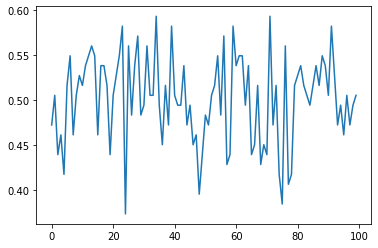

In [15]:
import matplotlib.pyplot as plt

plt.plot(valid_errors)

(array([ 2.,  2.,  5., 10., 12., 13., 22., 14., 12.,  8.]),
 array([0.37362637, 0.3956044 , 0.41758242, 0.43956044, 0.46153846,
        0.48351648, 0.50549451, 0.52747253, 0.54945055, 0.57142857,
        0.59340659]),
 <a list of 10 Patch objects>)

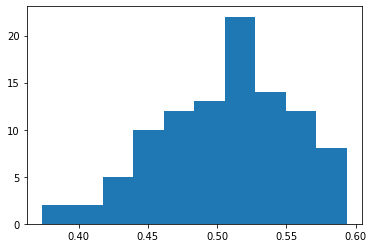

In [16]:
plt.hist(valid_errors)

In [18]:
np.mean(valid_errors)

0.5014285714285713

In [19]:
np.std(valid_errors)

0.04849267644832658

In [20]:
np.quantile(valid_errors, 0.05)

0.4175824175824176